# Задание 1
## Асимптотическая нормальность выборочных характеристик

## Импорты

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.special import gamma
import pandas as pd
from tqdm import tqdm

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

np.random.seed(0)


## Выбранное распределение:

### Нормальное: N(5, 4)

In [9]:
# N(5, 4)
mu = 5
sigma = 2

# Генерирация выборку размера n из выбранного распределения
def generate_sample(n):
    return np.random.normal(mu, sigma, n)

# Теоретическая функция распределения
def theoretical_cdf(x):
    return stats.norm.cdf(x, mu, sigma)

# Вычисление статистики для одной выборки
def calculate_statistics(sample):
    n = len(sample)
    sorted_sample = np.sort(sample)
    sample_mean = np.mean(sample)
    sample_var = np.var(sample, ddof=1)
    sample_median = np.median(sample)

    x_2 = sorted_sample[1]
    x_n_minus_2 = sorted_sample[-3]
    u1 = n * theoretical_cdf(x_2)
    u2 = n * (1 - theoretical_cdf(x_n_minus_2))
    return {
        'mean': sample_mean,
        'variance': sample_var,
        'median': sample_median,
        'u1': u1,
        'u2': u2,
    }


## Генерация выборок

In [10]:
# количество выборок
num_samples = 10000
# размер каждой выборки
sample_size = 100

sample_means = []
sample_variances = []
sample_medians = []
u1_values = []
u2_values = []

print(f"Генерация {num_samples} выборок размера {sample_size}...")

for i in tqdm(range(num_samples)):
    sample = generate_sample(sample_size)
    stats_dict = calculate_statistics(sample)

    sample_means.append(stats_dict['mean'])
    sample_variances.append(stats_dict['variance'])
    sample_medians.append(stats_dict['median'])

    u1_values.append(stats_dict['u1'])
    u2_values.append(stats_dict['u2'])

sample_means = np.array(sample_means)
sample_variances = np.array(sample_variances)
sample_medians = np.array(sample_medians)
u1_values = np.array(u1_values)
u2_values = np.array(u2_values)


Генерация 10000 выборок размера 100...


100%|██████████| 10000/10000 [00:00<00:00, 14353.35it/s]


## 1. Асимптотическая нормальность выборочного среднего

По ЦПТ:
$\sqrt{n}(\bar{X}_n - \mu) \xrightarrow{d} N(0, \sigma^2)$

Или эквивалентно:
$\bar{X}_n \xrightarrow{d} N(\mu, \sigma^2/n)$


=== ВЫБОРОЧНОЕ СРЕДНЕЕ ===
Теоретическое среднее: 5.0000
Эмпирическое  среднее: 5.0030


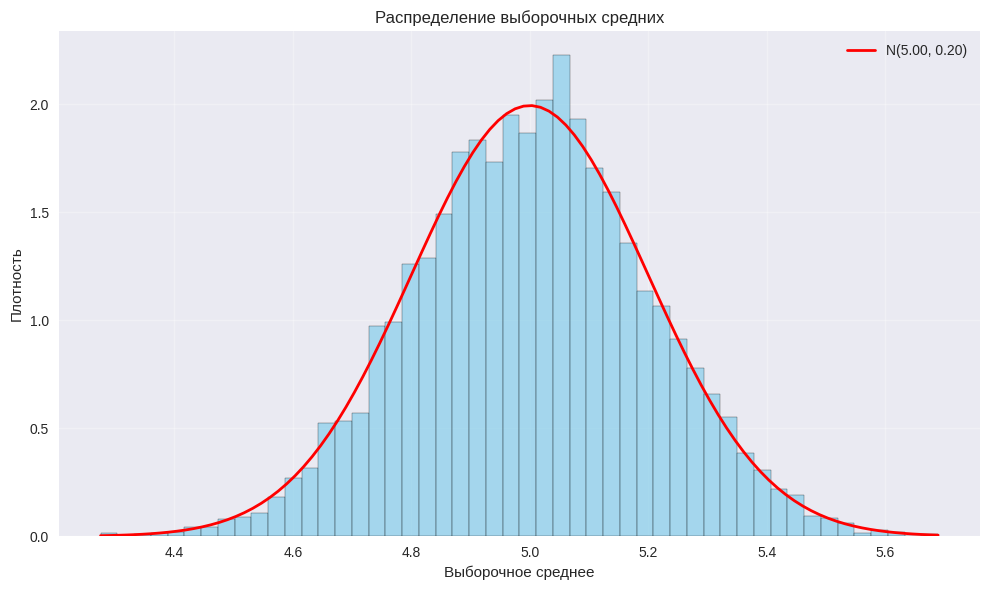

In [11]:
# Теоретические параметры для выборочного среднего
theoretical_mean = mu
theoretical_var = sigma**2

# Эмпирические статистики
empirical_mean_mean = np.mean(sample_means)
empirical_mean_std = np.std(sample_means, ddof=1)
empirical_mean_median = np.median(sample_means)

print("=== ВЫБОРОЧНОЕ СРЕДНЕЕ ===")
print(f"Теоретическое среднее: {theoretical_mean:.4f}")
print(f"Эмпирическое  среднее: {empirical_mean_mean:.4f}")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(sample_means, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x_range = np.linspace(sample_means.min(), sample_means.max(), 100)

theoretical_pdf = stats.norm.pdf(x_range, theoretical_mean, (sigma / np.sqrt(sample_size)))
ax.plot(x_range, theoretical_pdf, 'r-', linewidth=2, label=f'N({theoretical_mean:.2f}, {(sigma / np.sqrt(sample_size)):.2f})')

ax.set_title('Распределение выборочных средних')
ax.set_xlabel('Выборочное среднее')
ax.set_ylabel('Плотность')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 2. Асимптотическая нормальность выборочной дисперсии

По ЦПТ: $\sqrt{n}(S^2 - \sigma^2) \xrightarrow{d} N(0, \mu_4 - \sigma^4)$, где $\mu_4$ - четвертый центральный момент.

Для нормального распределения $\mu_4 = 3\sigma^4$, поэтому:
$\sqrt{n}(S^2 - \sigma^2) \xrightarrow{d} N(0, 2\sigma^4)$

=== ВЫБОРОЧНАЯ ДИСПЕРСИЯ ===
Теоретическое среднее: 4.0000
Эмпирическое среднее: 4.0000
Теоретическое СКО: 0.5657
Эмпирическое СКО: 0.5662
Эмпирическая медиана: 3.9729


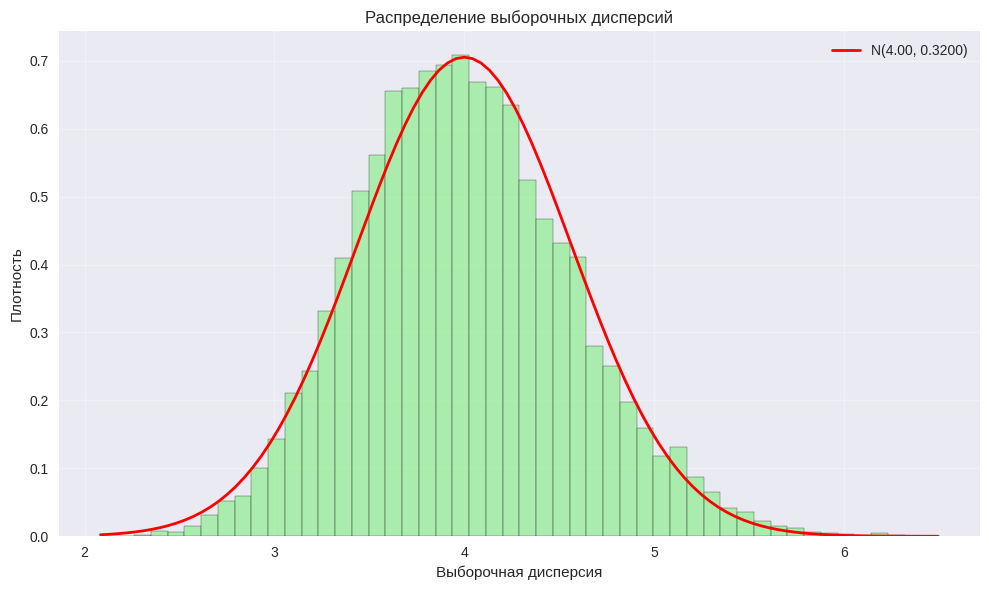

In [12]:
# Теоретические параметры для выборочной дисперсии
theoretical_var_mean = sigma**2
theoretical_var_var = 2 * sigma**4 / sample_size
theoretical_var_std = np.sqrt(theoretical_var_var)

# Эмпирические статистики
empirical_var_mean = np.mean(sample_variances)
empirical_var_std = np.std(sample_variances, ddof=1)
empirical_var_median = np.median(sample_variances)

print("=== ВЫБОРОЧНАЯ ДИСПЕРСИЯ ===")
print(f"Теоретическое среднее: {theoretical_var_mean:.4f}")
print(f"Эмпирическое среднее: {empirical_var_mean:.4f}")
print(f"Теоретическое СКО: {theoretical_var_std:.4f}")
print(f"Эмпирическое СКО: {empirical_var_std:.4f}")
print(f"Эмпирическая медиана: {empirical_var_median:.4f}")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(sample_variances, bins=50, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
x_range = np.linspace(sample_variances.min(), sample_variances.max(), 100)
theoretical_pdf = stats.norm.pdf(x_range, theoretical_var_mean, theoretical_var_std)
ax.plot(x_range, theoretical_pdf, 'r-', linewidth=2, label=f'N({theoretical_var_mean:.2f}, {theoretical_var_var:.4f})')
ax.set_title('Распределение выборочных дисперсий')
ax.set_xlabel('Выборочная дисперсия')
ax.set_ylabel('Плотность')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 3. Асимптотическая нормальность выборочной медианы

Для непрерывного распределения с плотностью $f$ медиана $m$ удовлетворяет: $F(m) = 0.5$

По теореме об асимптотической нормальности квантилей:
$\sqrt{n}(\hat{q}_{0.5} - q_{0.5}) \xrightarrow{d} N\left(0, \frac{0.5(1-0.5)}{f^2(q_{0.5})}\right) = N\left(0, \frac{0.25}{f^2(m)}\right)$

Для $N(\mu, \sigma^2)$: $m = \mu = 5$, $f(m) = \frac{1}{\sigma\sqrt{2\pi}} = \frac{1}{2\sqrt{2\pi}}$

=== ВЫБОРОЧНАЯ МЕДИАНА ===
Теоретическое среднее: 5.0000
Эмпирическое среднее: 5.0051
Теоретическое СКО: 0.2507
Эмпирическое СКО: 0.2482
Эмпирическая медиана: 5.0054
Плотность в точке медианы: 0.1995


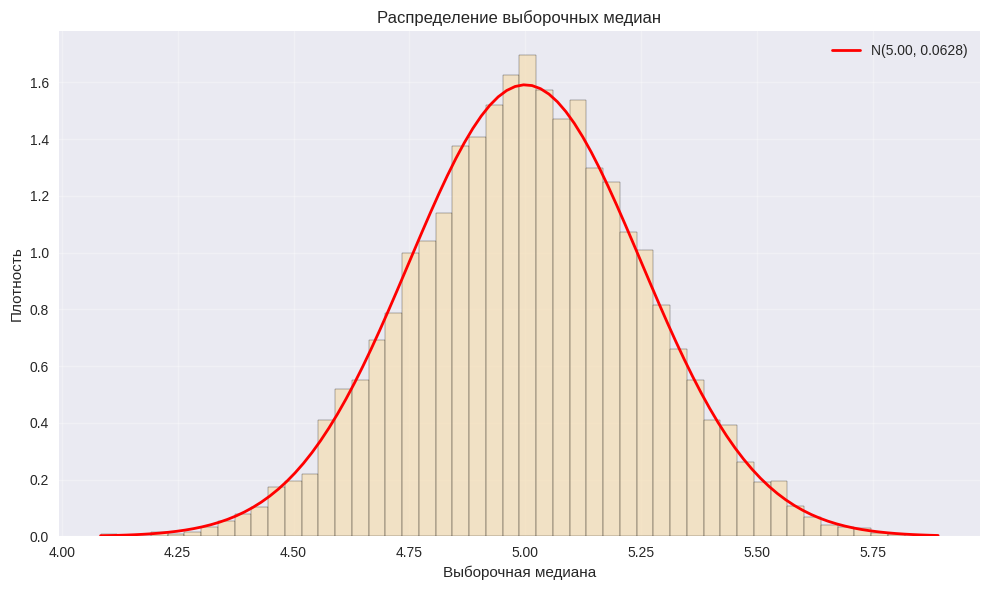

In [13]:
theoretical_median_mean = mu  # медиана нормального распределения равна среднему
f_at_median = 1 / (sigma * np.sqrt(2 * np.pi))  # плотность в точке медианы
theoretical_median_var = 0.25 / (sample_size * f_at_median**2)
theoretical_median_std = np.sqrt(theoretical_median_var)

empirical_median_mean = np.mean(sample_medians)
empirical_median_std = np.std(sample_medians, ddof=1)
empirical_median_median = np.median(sample_medians)

print("=== ВЫБОРОЧНАЯ МЕДИАНА ===")
print(f"Теоретическое среднее: {theoretical_median_mean:.4f}")
print(f"Эмпирическое среднее: {empirical_median_mean:.4f}")
print(f"Теоретическое СКО: {theoretical_median_std:.4f}")
print(f"Эмпирическое СКО: {empirical_median_std:.4f}")
print(f"Эмпирическая медиана: {empirical_median_median:.4f}")
print(f"Плотность в точке медианы: {f_at_median:.4f}")

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(sample_medians, bins=50, density=True, alpha=0.7, color='wheat', edgecolor='black')
x_range = np.linspace(sample_medians.min(), sample_medians.max(), 100)
theoretical_pdf = stats.norm.pdf(x_range, theoretical_median_mean, theoretical_median_std)
ax.plot(x_range, theoretical_pdf, 'r-', linewidth=2, label=f'N({theoretical_median_mean:.2f}, {theoretical_median_var:.4f})')
ax.set_title('Распределение выборочных медиан')
ax.set_xlabel('Выборочная медиана')
ax.set_ylabel('Плотность')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Проверка сходимости порядковых статистик

Теорема:
- $nF(X_{(k)}) \xrightarrow{d} \text{Gamma}(k, 1)$
- $n(1-F(X_{(n-k+1)})) \xrightarrow{d} \text{Gamma}(k, 1)$

Проверяем:
1. $nF(X_{(2)}) \xrightarrow{d} \Gamma(2, 1)$
2. $n(1-F(X_{(n-2)})) \xrightarrow{d} \Gamma(3, 1)$ (так как $n-2 = n-(3-1)$)

=== U1 = nF(X_(2)) ===
Теоретическое среднее Γ(2,1): 2.0000
Эмпирическое среднее: 1.9778
Теоретическое СКО: 1.4142
Эмпирическое СКО: 1.3632
Эмпирическая медиана: 1.6984

=== U2 = n(1-F(X_(n-2))) ===
Теоретическое среднее Γ(3,1): 3.0000
Эмпирическое среднее: 2.9664
Теоретическое СКО: 1.7321
Эмпирическое СКО: 1.6781
Эмпирическая медиана: 2.6650


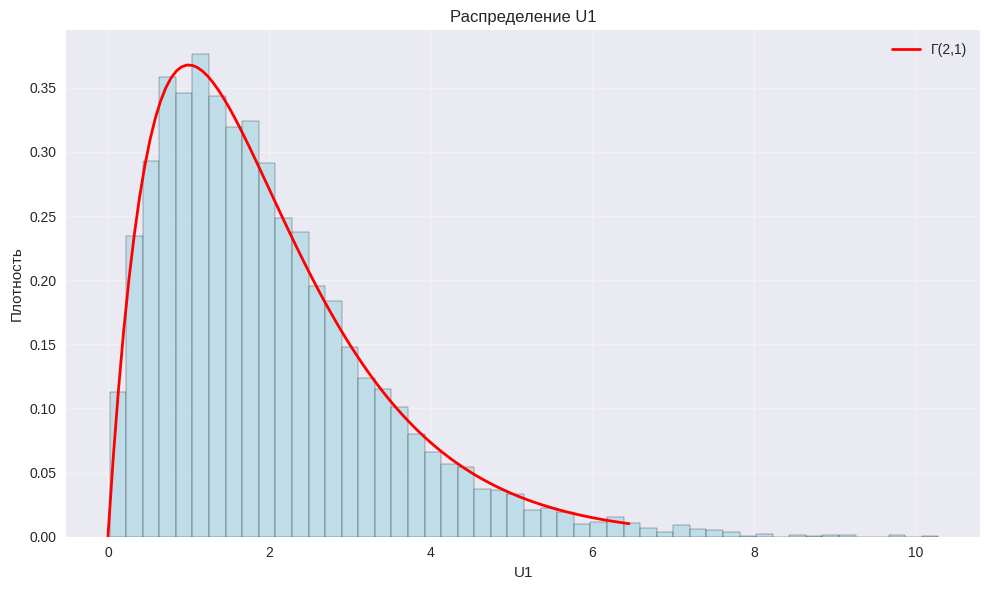

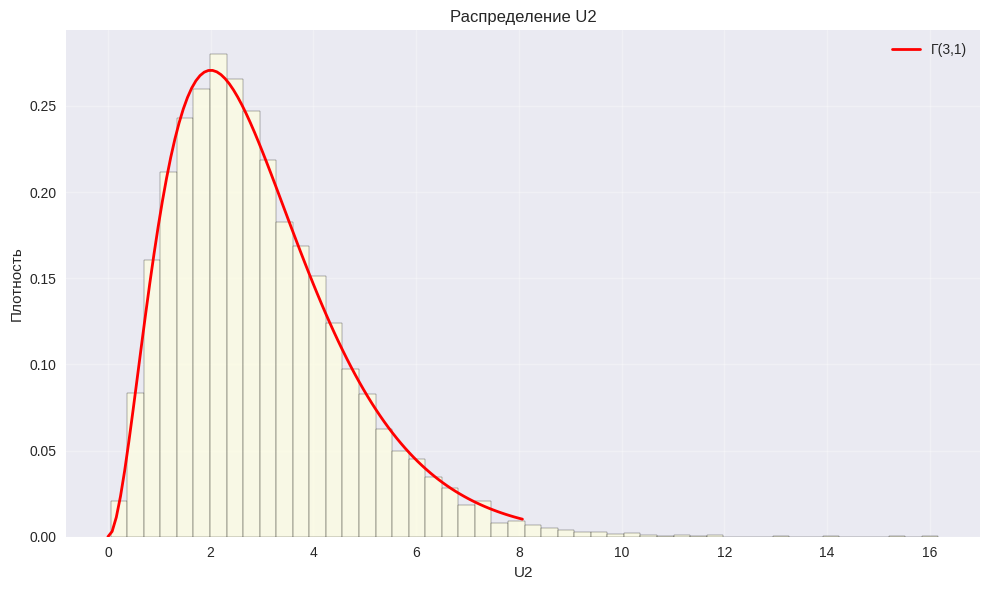

In [14]:
# Анализ U1 = nF(X_(2))
print("=== U1 = nF(X_(2)) ===")
empirical_u1_mean = np.mean(u1_values)
empirical_u1_std = np.std(u1_values, ddof=1)
empirical_u1_median = np.median(u1_values)

# Теоретические параметры Gamma(2, 1)
theoretical_u1_mean = 2  # shape * scale = 2 * 1
theoretical_u1_var = 2   # shape * scale^2 = 2 * 1^2
theoretical_u1_std = np.sqrt(theoretical_u1_var)

print(f"Теоретическое среднее Γ(2,1): {theoretical_u1_mean:.4f}")
print(f"Эмпирическое среднее: {empirical_u1_mean:.4f}")
print(f"Теоретическое СКО: {theoretical_u1_std:.4f}")
print(f"Эмпирическое СКО: {empirical_u1_std:.4f}")
print(f"Эмпирическая медиана: {empirical_u1_median:.4f}")

print("\n=== U2 = n(1-F(X_(n-2))) ===")
empirical_u2_mean = np.mean(u2_values)
empirical_u2_std = np.std(u2_values, ddof=1)
empirical_u2_median = np.median(u2_values)

# Теоретические параметры Gamma(3, 1)
theoretical_u2_mean = 3  # shape * scale = 3 * 1
theoretical_u2_var = 3   # shape * scale^2 = 3 * 1^2
theoretical_u2_std = np.sqrt(theoretical_u2_var)

print(f"Теоретическое среднее Γ(3,1): {theoretical_u2_mean:.4f}")
print(f"Эмпирическое среднее: {empirical_u2_mean:.4f}")
print(f"Теоретическое СКО: {theoretical_u2_std:.4f}")
print(f"Эмпирическое СКО: {empirical_u2_std:.4f}")
print(f"Эмпирическая медиана: {empirical_u2_median:.4f}")

# График для U1 = nF(X_(2))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(u1_values, bins=50, density=True, alpha=0.7, color='lightblue', edgecolor='black')
x_range_u1 = np.linspace(0, np.percentile(u1_values, 99), 100)
theoretical_pdf_u1 = stats.gamma.pdf(x_range_u1, a=2, scale=1)
ax.plot(x_range_u1, theoretical_pdf_u1, 'r-', linewidth=2, label='Γ(2,1)')
ax.set_title('Распределение U1')
ax.set_xlabel('U1')
ax.set_ylabel('Плотность')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# График для U2 = n(1-F(X_(n-2)))
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

ax.hist(u2_values, bins=50, density=True, alpha=0.7, color='lightyellow', edgecolor='black')
x_range_u2 = np.linspace(0, np.percentile(u2_values, 99), 100)
theoretical_pdf_u2 = stats.gamma.pdf(x_range_u2, a=3, scale=1)
ax.plot(x_range_u2, theoretical_pdf_u2, 'r-', linewidth=2, label='Γ(3,1)')
ax.set_title('Распределение U2')
ax.set_xlabel('U2')
ax.set_ylabel('Плотность')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 5. Результаты

1. **Выборочное среднее**: Экспериментально подтверждена асимптотическая нормальность с теоретическими параметрами $N(\mu, \sigma^2/n)$

2. **Выборочная дисперсия**: Показана асимптотическая нормальность согласно ЦПТ для моментов

3. **Выборочная медиана**: Подтверждена асимптотическая нормальность с дисперсией, обратно пропорциональной квадрату плотности в точке медианы

4. **Порядковые статистики**: 
   - $nF(X_{(2)}) \rightarrow \Gamma(2,1)$
   - $n(1-F(X_{(n-2)})) \rightarrow \Gamma(3,1)$

### Методы валидации:
- Сравнение эмпирических и теоретических функций распределения
